In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, broyden1

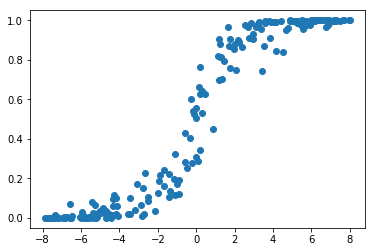

In [2]:
# Задаем рандомное распределение точек
x = np.sort(np.random.uniform(-8, 8, 200))
ar = np.random.uniform(0.5, 1.5, 200)
br = np.random.uniform(-1, 1, 200)

y = 1/(1+np.exp(-ar*x-br))
plt.plot(x, y, marker="o", ls="")

plt.show()

In [3]:
def expab(x, a, b):
    return np.exp(-(a * x + b))

def dervua(a, b, x, y):
    eab = expab(x, a, b)
    return 2 * x * eab * (1 - y * (1 + eab)) / (1 + eab)**3

def dervub(a, b, x):
    eab = expab(x, a, b)
    return 2 * eab * (1 - y * (1 + eab)) / (1 + eab)**3

def sumdervua(a, b, x, y):
    return np.sum(dervua(a, b, x, y))

def sumdervub(a, b, x):
    return np.sum(dervub(a, b, x))

def equations(vrs, x, y):
    a = vrs[0]
    b = vrs[1]
    return (sumdervua(a, b, x, y), sumdervub(a, b, x))

In [4]:
a, b =  fsolve(func=equations, x0=(1, 1), args=(x, y))
print(a, b)

0.9696822552694099 -0.05709580095844399


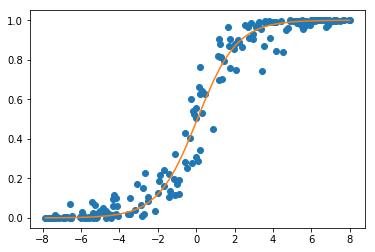

In [5]:
plt.plot(x, y, marker="o", ls="")
plt.plot(x, 1/(1+np.exp(-a*x-b)))
plt.show()